In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset
df=pd.read_csv(r"C:\Users\abdur\Downloads\archive (5) (1) (1) (1)\Breast_Cancer.csv")
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [3]:
df.shape

(4024, 16)

In [4]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
df.Race.unique()

array(['White', 'Black', 'Other'], dtype=object)

In [7]:
df.rename(columns={'Marital Status':'MaritalStatus'},inplace=True)
df.MaritalStatus.unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [8]:
df.differentiate.unique()

array(['Poorly differentiated', 'Moderately differentiated',
       'Well differentiated', 'Undifferentiated'], dtype=object)

In [9]:
df.Grade.unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [10]:
df.rename(columns={'Progesterone Status':'ProgesteroneStatus'},inplace=True)

In [11]:
print(df.columns)

Index(['Age', 'Race', 'MaritalStatus', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'ProgesteroneStatus', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Status'],
      dtype='object')


In [12]:
df.ProgesteroneStatus.unique()

array(['Positive', 'Negative'], dtype=object)

In [13]:
df.rename(columns={'6th Stage':'SixthStage'},inplace=True)

In [14]:
print(df.columns)

Index(['Age', 'Race', 'MaritalStatus', 'T Stage ', 'N Stage', 'SixthStage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'ProgesteroneStatus', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Status'],
      dtype='object')


In [15]:
df.SixthStage.unique()

array(['IIA', 'IIIA', 'IIIC', 'IIB', 'IIIB'], dtype=object)

In [16]:
df.rename(columns={'Estrogen Status':'EstrogenStatus'},inplace=True)
df.EstrogenStatus.unique()

array(['Positive', 'Negative'], dtype=object)

In [17]:
print(df.columns)

Index(['Age', 'Race', 'MaritalStatus', 'T Stage ', 'N Stage', 'SixthStage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'EstrogenStatus',
       'ProgesteroneStatus', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months', 'Status'],
      dtype='object')


In [18]:
df.rename(columns={'A Stage':'AStage'},inplace=True)
df.AStage.unique()

array(['Regional', 'Distant'], dtype=object)

In [19]:
df.rename(columns={'Tumor Size':'TumorSize'},inplace=True)
df.TumorSize.unique()

array([  4,  35,  63,  18,  41,  20,   8,  30, 103,  32,  13,  59,  15,
        19,  46,  24,  25,  29,  40,  70,  22,  50,  17,  21,  10,  27,
        23,   5,  51,   9,  55, 120,  77,   2,  11,  12,  26,  75, 130,
        34,  80,   3,  60,  14,  16,  45,  36,  76,  38,  49,   7,  72,
       100,  43,  62,  37,  68,  52,  85,  57,  39,  28,  48, 110,  65,
         6, 105, 140,  42,  31,  90, 108,  98,  47,  54,  61,  74,  33,
         1,  87,  81,  58, 117,  44, 123, 133,  95, 107,  92,  69,  56,
        82,  66,  78,  97,  88,  53,  83, 101,  84, 115,  73, 125, 104,
        94,  86,  64,  96,  79,  67])

In [20]:
df.rename(columns={'Regional Node Examined':'RegionalNodeExamined'},inplace=True)
df.RegionalNodeExamined.unique()

array([24, 14,  2,  3, 18, 11,  9, 20, 21, 13, 23, 16,  1, 22, 15,  4, 26,
       31, 25, 10,  5,  6, 19, 12,  8, 17,  7, 49, 33, 30, 34, 28, 32, 27,
       42, 29, 41, 39, 46, 40, 51, 44, 38, 47, 54, 36, 61, 37, 35, 43, 52,
       45, 57, 60])

In [21]:
df.rename(columns={'Reginol Node Positive':'ReginolNodePositive'},inplace=True)
df.ReginolNodePositive.unique()

array([ 1,  5,  7,  2, 18, 12,  3, 14, 22, 17, 23,  4, 10,  6,  9,  8, 20,
       16, 13, 11, 24, 27, 21, 26, 15, 28, 19, 29, 31, 46, 33, 37, 30, 35,
       25, 32, 41, 34])

In [22]:
print(df.columns)

Index(['Age', 'Race', 'MaritalStatus', 'T Stage ', 'N Stage', 'SixthStage',
       'differentiate', 'Grade', 'AStage', 'TumorSize', 'EstrogenStatus',
       'ProgesteroneStatus', 'RegionalNodeExamined', 'ReginolNodePositive',
       'Survival Months', 'Status'],
      dtype='object')


In [23]:
df.rename(columns={'Survival Months':'SurvivalMonths'},inplace=True)
df.SurvivalMonths.unique()

array([ 60,  62,  75,  84,  50,  89,  54,  14,  70,  92,  64,  56,  38,
        49, 105, 107,  77,  81,  78, 102,  98,  82,  86,  52,  90,  31,
        37, 103,  42,  61,  63,  39,  59,  71,  74,  73,  91, 106,  80,
        44,  85,  79, 104,  12,  95,  55, 101,  65,  72,  57,  87,  40,
        25,   8,  53,  58,  24,  66,  69,  93,  94, 100,  96,  41,  67,
        51,  13,  11,  47,  23,  45,  68,  76,  15,  16,  99,   7,  48,
        88,  34,  97,  83,  17,   3,  22,  30,   6,  32,   9,   5,  10,
        19,  18,  35,  27,  36,   4,  29,  33,  26,  20,  28,  43,   1,
        46,  21,   2])

In [24]:
df.Status.unique()

array(['Alive', 'Dead'], dtype=object)

In [25]:
df.rename(columns={'T Stage ':'TStage'},inplace=True)
df.TStage.unique()

array(['T1', 'T2', 'T3', 'T4'], dtype=object)

In [26]:
print(df.columns)

Index(['Age', 'Race', 'MaritalStatus', 'TStage', 'N Stage', 'SixthStage',
       'differentiate', 'Grade', 'AStage', 'TumorSize', 'EstrogenStatus',
       'ProgesteroneStatus', 'RegionalNodeExamined', 'ReginolNodePositive',
       'SurvivalMonths', 'Status'],
      dtype='object')


In [27]:
df.rename(columns={'N Stage':'NStage'},inplace=True)


In [28]:
df.NStage.unique()

array(['N1', 'N2', 'N3'], dtype=object)

In [29]:
df.rename(columns={' Stage':'NStage'},inplace=True)


In [30]:
race={'White':0, 'Black':1, 'Other':2}
df['Race']=df.Race.map(race)
df['Race']

0       0
1       0
2       0
3       0
4       0
       ..
4019    2
4020    0
4021    0
4022    1
4023    0
Name: Race, Length: 4024, dtype: int64

In [31]:
maritalstatus={'Married':0, 'Divorced':1, 'Single ':2, 'Widowed':3, 'Separated':4}
df['MaritalStatus']=df.MaritalStatus.map(maritalstatus)
df['MaritalStatus']

0       0
1       0
2       1
3       0
4       0
       ..
4019    0
4020    1
4021    0
4022    1
4023    0
Name: MaritalStatus, Length: 4024, dtype: int64

In [32]:
tstage={'T1':0, 'T2':1, 'T3':2, 'T4':3}
df['TStage']=df.TStage.map(tstage)
df['TStage']

0       0
1       1
2       2
3       0
4       1
       ..
4019    0
4020    1
4021    1
4022    1
4023    1
Name: TStage, Length: 4024, dtype: int64

In [33]:
nstage={'N1':0, 'N2':1, 'N3':2}
df['NStage']=df.NStage.map(nstage)
df['NStage']

0       0
1       1
2       2
3       0
4       0
       ..
4019    0
4020    1
4021    0
4022    0
4023    0
Name: NStage, Length: 4024, dtype: int64

In [34]:
sixthstage={'IIA':0, 'IIIA':1, 'IIIC':2, 'IIB':3, 'IIIB':3}
df['SixthStage']=df.SixthStage.map(sixthstage)
df['SixthStage']

0       0
1       1
2       2
3       0
4       3
       ..
4019    0
4020    1
4021    3
4022    3
4023    3
Name: SixthStage, Length: 4024, dtype: int64

In [35]:
Differentiate={'Poorly differentiated':0, 'Moderately differentiated':1,'Well differentiated':2, 'Undifferentiated':3}
df['differentiate']=df.differentiate.map(Differentiate)
df['differentiate']

0       0
1       1
2       1
3       0
4       0
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: differentiate, Length: 4024, dtype: int64

In [36]:
astage={'Regional':0, 'Distant':1}
df['AStage']=df.AStage.map(astage)
df['AStage']

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: AStage, Length: 4024, dtype: int64

In [37]:
estrogenStatus={'Positive':0, 'Negative':1}
df['EstrogenStatus']=df.EstrogenStatus.map(estrogenStatus)
df['EstrogenStatus']

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: EstrogenStatus, Length: 4024, dtype: int64

In [38]:
progesteroneStatus={'Positive':0, 'Negative':1}
df['ProgesteroneStatus']=df.ProgesteroneStatus.map(progesteroneStatus)
df['ProgesteroneStatus']

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    1
4022    0
4023    0
Name: ProgesteroneStatus, Length: 4024, dtype: int64

In [39]:
grade={'3':0, '2':1, '1':2, ' anaplastic; Grade IV':3}
df['Grade']=df.Grade.map(grade)
df['Grade']

0       0
1       1
2       1
3       0
4       0
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: Grade, Length: 4024, dtype: int64

In [40]:
status={'Alive':0 ,'Dead':1}
df['Status']=df.Status.map(status)
df['Status']

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: Status, Length: 4024, dtype: int64

In [41]:
df

,Age,Race,MaritalStatus,TStage,NStage,SixthStage,differentiate,Grade,AStage,TumorSize,EstrogenStatus,ProgesteroneStatus,RegionalNodeExamined,ReginolNodePositive,SurvivalMonths,Status
0,68,0,0,0,0,0,0,0,0,4,0,0,24,1,60,0
1,50,0,0,1,1,1,1,1,0,35,0,0,14,5,62,0
2,58,0,1,2,2,2,1,1,0,63,0,0,14,7,75,0
3,58,0,0,0,0,0,0,0,0,18,0,0,2,1,84,0
4,47,0,0,1,0,3,0,0,0,41,0,0,3,1,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,2,0,0,0,0,1,1,0,9,0,0,1,1,49,0
4020,56,0,1,1,1,1,1,1,0,46,0,0,14,8,69,0
4021,68,0,0,1,0,3,1,1,0,22,0,1,11,3,69,0
4022,58,1,1,1,0,3,1,1,0,44,0,0,11,1,72,0


In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, 
                                                    stratify = df['Status'] )

In [44]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (3219, 15)
X_test shape: (805, 15)
Y_train shape: (3219,)
Y_test shape: (805,)


In [45]:
def content(name,ytest,pred):
    print("-----------",name,"-----------------")
    import seaborn as sns
    plt.title("Confusion matrix")
    sns.heatmap((confusion_matrix(Y_test, pred)%100), annot=True, cmap="YlGn")
    plt.xlabel('Predicted classes')
    plt.ylabel('True Classes')
    plt.figure(figsize=(6,6)) 
    plt.show()
    
    conf_Mat=(confusion_matrix(Y_test, pred)%100)
    TN = conf_Mat[0][0]
    FN = conf_Mat[1][0]
    TP = conf_Mat[1][1]
    FP = conf_Mat[0][1]

                        

    Sensitivity=TP/(TP+FN)*100
    print("--------------Sensitivity----------------")
    print("Sensitivity of", name ," is" ,round(Sensitivity,2))

    Specificity=TN/(TN+FP)*100
    print("--------------Specificity----------------")
    print("Specificity of",name," is",round(Specificity,2))

----------- Ada Boost -----------------


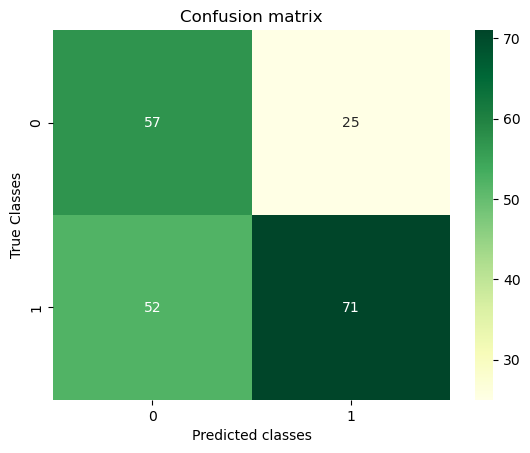

<Figure size 600x600 with 0 Axes>

--------------Sensitivity----------------
Sensitivity of Ada Boost  is 57.72
--------------Specificity----------------
Specificity of Ada Boost  is 69.51


In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
abc = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, Y_train)
pred_abc=abc.predict(X_test)
content("Ada Boost",Y_test, pred_abc)

----------- svm -----------------


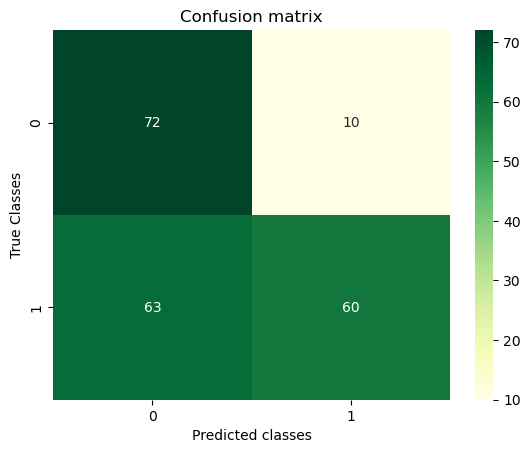

<Figure size 600x600 with 0 Axes>

--------------Sensitivity----------------
Sensitivity of svm  is 48.78
--------------Specificity----------------
Specificity of svm  is 87.8


In [47]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)
pred_svc=svc.predict(X_test)
content("svm",Y_test, pred_svc)

----------- ranfor -----------------


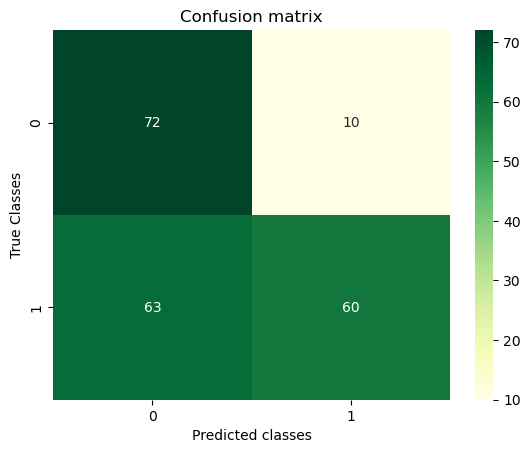

<Figure size 600x600 with 0 Axes>

--------------Sensitivity----------------
Sensitivity of ranfor  is 48.78
--------------Specificity----------------
Specificity of ranfor  is 87.8


In [48]:
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)
pred_ranfor=ranfor.predict(X_test)
content("ranfor",Y_test, pred_svc)

----------- KNeighborsClassifier -----------------


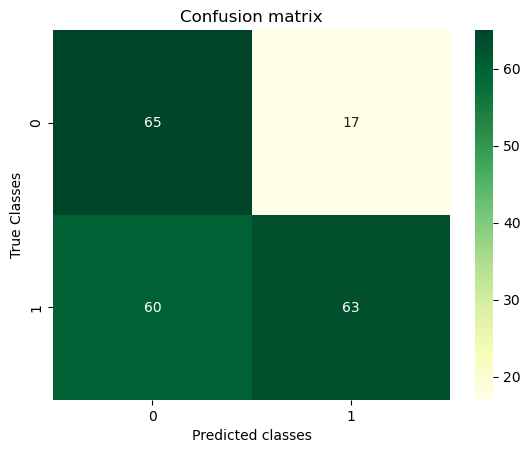

<Figure size 600x600 with 0 Axes>

--------------Sensitivity----------------
Sensitivity of KNeighborsClassifier  is 51.22
--------------Specificity----------------
Specificity of KNeighborsClassifier  is 79.27


In [49]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)
pred_knn=knn.predict(X_test)
content("KNeighborsClassifier",Y_test, pred_knn)

----------- MLPClassifier -----------------


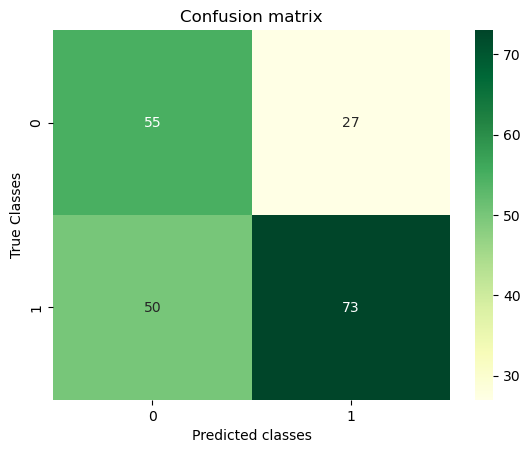

<Figure size 600x600 with 0 Axes>

--------------Sensitivity----------------
Sensitivity of MLPClassifier  is 59.35
--------------Specificity----------------
Specificity of MLPClassifier  is 67.07


In [50]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
clf.fit(X_train, Y_train)
pred_clf=clf.predict(X_test)
content("MLPClassifier",Y_test, pred_clf)

----------- load_iris -----------------


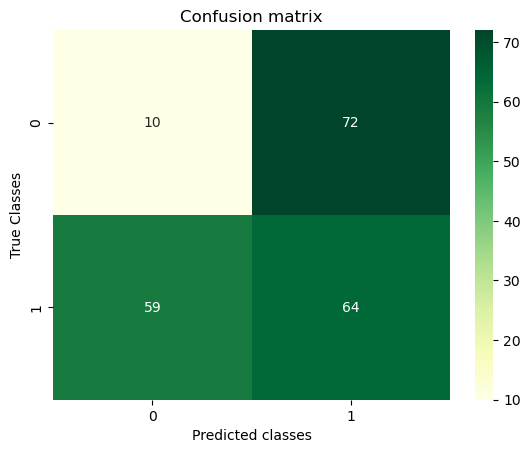

<Figure size 600x600 with 0 Axes>

--------------Sensitivity----------------
Sensitivity of load_iris  is 52.03
--------------Specificity----------------
Specificity of load_iris  is 12.2


In [51]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
pred_gnb=gnb.predict(X_test)
content("load_iris",Y_test, pred_gnb)

----------- decision_tree -----------------


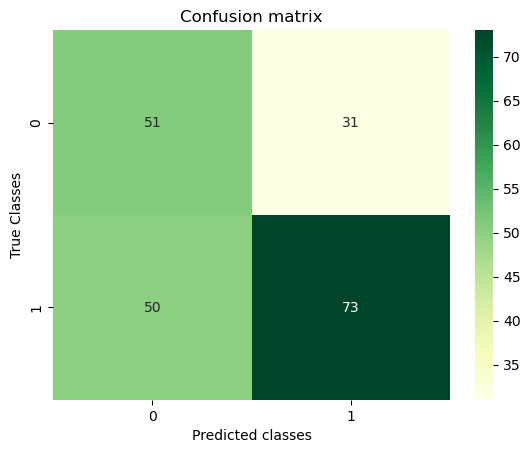

<Figure size 600x600 with 0 Axes>

--------------Sensitivity----------------
Sensitivity of decision_tree  is 59.35
--------------Specificity----------------
Specificity of decision_tree  is 62.2


In [52]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(X_train, Y_train)
pred_decision_tree=decision_tree.predict(X_test)
content("decision_tree",Y_test, pred_decision_tree)

----------- LogisticRegression -----------------


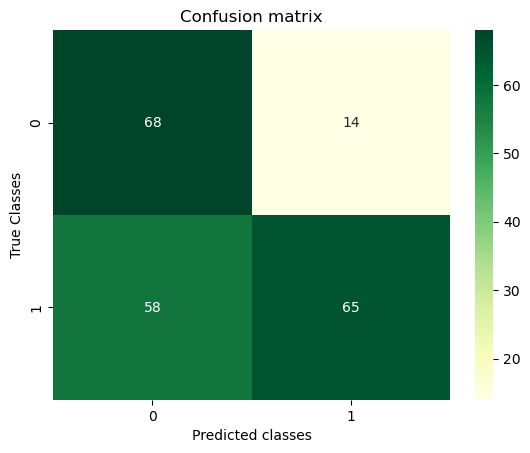

<Figure size 600x600 with 0 Axes>

--------------Sensitivity----------------
Sensitivity of LogisticRegression  is 52.85
--------------Specificity----------------
Specificity of LogisticRegression  is 82.93


In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
clf = LogisticRegression(random_state=0)
clf.fit(X_train, Y_train)
pred_clf=clf.predict(X_test)
content("LogisticRegression",Y_test, pred_clf)

----------- GradientBoostingClassifier -----------------


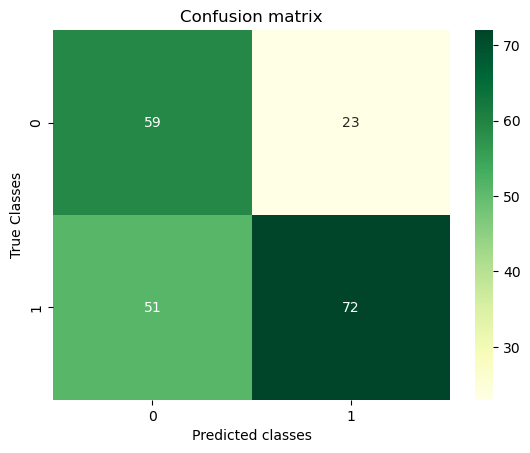

<Figure size 600x600 with 0 Axes>

--------------Sensitivity----------------
Sensitivity of GradientBoostingClassifier  is 58.54
--------------Specificity----------------
Specificity of GradientBoostingClassifier  is 71.95


In [54]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, Y_train)
pred_clf=clf.predict(X_test)
content("GradientBoostingClassifier",Y_test, pred_clf)